In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, average_precision_score

2023-05-18 03:08:31.597741: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 03:08:34.983150: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
model = tf.keras.models.load_model('../results/models/model_ResNet50_imagenet_050923.h5')

2023-05-18 03:08:45.523839: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7962 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB MIG 2g.10gb, pci bus id: 0000:21:00.0, compute capability: 8.0


In [4]:
test_dir = '../data/frames/test'
img_size = 512
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode='categorical', seed=0, image_size=(img_size, img_size), batch_size=1, color_mode='rgb')

Found 1469 files belonging to 9 classes.


In [12]:
#get a prediction for the first image in the test dataset and print the predicted class
y_pred = model.predict(test_ds)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_ds.classes
from matplotlib import pyplot as plt
plt.hist(y_pred)
plt.show()

1469/1469 [==============================] - 22s 14ms/step


AttributeError: '_BatchDataset' object has no attribute 'classes'

In [5]:
#get a prediction for the first image in the test dataset and print the predicted class
for images, labels in test_ds.take(1):
    pred = model.predict(images)
    label = labels.numpy()

2023-05-18 03:09:12.489680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1469]
	 [[{{node Placeholder/_4}}]]
2023-05-18 03:09:12.490241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1469]
	 [[{{node Placeholder/_4}}]]
2023-05-18 03:09:15.671163: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8801
2023-05-18 03:09:16.702295: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1/1 [==============================] - 5s 5s/step


In [6]:
pred.shape

(1, 9)

In [7]:
pred

array([[7.1512404e-05, 2.0707622e-08, 7.1995659e-05, 9.9068253e-05,
        4.2873330e-02, 3.9953054e-09, 1.8171593e-05, 3.8120458e-03,
        9.5305377e-01]], dtype=float32)

In [8]:
cols = os.listdir(test_dir)

In [9]:
preds_df = pd.DataFrame(columns=cols)
trues_df = pd.DataFrame(columns=cols)

In [10]:
label.shape

(1, 9)

In [11]:
#add pred to the first row of preds_df
preds_df.loc[0] = pred[0]
preds_df.head()

eso_mob      exposure  fundus_mob  hiatal_dissec  hiatal_repair  \
0  0.000072  2.070762e-08    0.000072       0.000099       0.042873   

            oob  peg_placement  sac_excision      wrap  
0  3.995305e-09       0.000018      0.003812  0.953054

In [12]:
#for each image in the test dataset, get the predicted probability of each class and the true class and the image path
count = 0
for images, labels in test_ds:
    pred = model.predict(images)
    label = labels.numpy()
    preds_df.loc[count] = pred[0]
    trues_df.loc[count] = label[0]
    count += 1


2023-05-18 03:11:57.984656: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1469]
	 [[{{node Placeholder/_4}}]]
2023-05-18 03:11:57.985139: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1469]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 48ms/step


In [13]:
preds_df['path'] = test_ds.file_paths
trues_df['path'] = test_ds.file_paths

In [14]:
preds_df.head()

eso_mob      exposure    fundus_mob  hiatal_dissec  hiatal_repair  \
0  2.646268e-02  4.715062e-03  2.149370e-01       0.752406   1.579521e-05   
1  2.803916e-10  1.130062e-09  9.138002e-07       0.999999   1.158467e-15   
2  6.887877e-02  7.774602e-02  1.733553e-01       0.612150   1.567264e-02   
3  2.727541e-02  1.370058e-02  8.531076e-01       0.105002   2.111914e-04   
4  3.599246e-02  1.153013e-02  9.737442e-02       0.798045   3.646923e-03   

            oob  peg_placement  sac_excision          wrap  \
0  1.292812e-08   5.426663e-06  1.454340e-03  4.142396e-06   
1  1.814680e-20   1.629043e-14  2.073959e-10  2.949471e-15   
2  4.859254e-04   3.121648e-02  1.872880e-02  1.765771e-03   
3  6.919301e-06   1.649769e-04  3.873928e-04  1.434898e-04   
4  2.245540e-05   3.633340e-04  5.279021e-02  2.345825e-04   

                                               path  
0   ../data/frames/test/hiatal_dissec/vid_0_610.jpg  
1  ../data/frames/test/peg_placement/vid_0_3840.jpg  
2               ../data/frames/test/oob/vid_1_0.jpg  
3  ../data/frames/test/hiatal_dissec/vid_1_1070.jpg  
4          ../data/frames/test/wrap/vid_11_4900.jpg

In [15]:
trues_df.head()

eso_mob  exposure  fundus_mob  hiatal_dissec  hiatal_repair  oob  \
0      0.0       0.0         0.0            1.0            0.0  0.0   
1      0.0       0.0         0.0            1.0            0.0  0.0   
2      0.0       0.0         0.0            0.0            0.0  0.0   
3      0.0       0.0         1.0            0.0            0.0  0.0   
4      0.0       0.0         0.0            0.0            0.0  0.0   

   peg_placement  sac_excision  wrap  \
0            0.0           0.0   0.0   
1            0.0           0.0   0.0   
2            1.0           0.0   0.0   
3            0.0           0.0   0.0   
4            0.0           1.0   0.0   

                                               path  
0   ../data/frames/test/hiatal_dissec/vid_0_610.jpg  
1  ../data/frames/test/peg_placement/vid_0_3840.jpg  
2               ../data/frames/test/oob/vid_1_0.jpg  
3  ../data/frames/test/hiatal_dissec/vid_1_1070.jpg  
4          ../data/frames/test/wrap/vid_11_4900.jpg

In [16]:
#save the preds and trues to csv
preds_df.to_csv('../results/preds/preds_ResNet50_imagenet_050923.csv', index=False)
trues_df.to_csv('../results/preds/trues_ResNet50_imagenet_050923.csv', index=False)

In [17]:
#add _pred to the column names of preds_df
preds_df.columns = [str(col) + '_pred' for col in preds_df.columns]
#add _true to the column names of trues_df
trues_df.columns = [str(col) + '_true' for col in trues_df.columns]

In [18]:
scores_df = pd.DataFrame(columns=['accuracy', 'AUROC', 'AUPRC', 'sensitivity', 'specificity'])
for phase in cols:
    #get the predicted probability of each class and the true class for the current phase
    preds = preds_df[phase + '_pred']
    trues = trues_df[phase + '_true']
    #calculate the AUROC
    auroc = roc_auc_score(trues, preds)
    #calculate the AUPRC
    auprc = average_precision_score(trues, preds)
    #calculate the accuracy
    acc = accuracy_score(trues, preds.round())
    #calculate the sensitivity
    sens = recall_score(trues, preds.round())
    #calculate the specificity
    spec = recall_score(trues, preds.round(), pos_label=0)
    #add the scores to the scores_df
    scores_df.loc[phase] = [acc, auroc, auprc, sens, spec]
scores_df

accuracy     AUROC     AUPRC  sensitivity  specificity
eso_mob        0.924438  0.941511  0.786206     0.670157     0.962441
exposure       0.972090  0.986675  0.855435     0.868852     0.976562
fundus_mob     0.948264  0.920242  0.507647     0.547945     0.969198
hiatal_dissec  0.897890  0.943002  0.787362     0.762712     0.916409
hiatal_repair  0.888359  0.932843  0.863581     0.659341     0.963801
oob            0.945541  0.992986  0.948896     0.512346     0.999235
peg_placement  0.942138  0.907121  0.315125     0.155172     0.974486
sac_excision   0.939415  0.901929  0.543187     0.254386     0.997048
wrap           0.935330  0.969888  0.906563     0.706320     0.986667

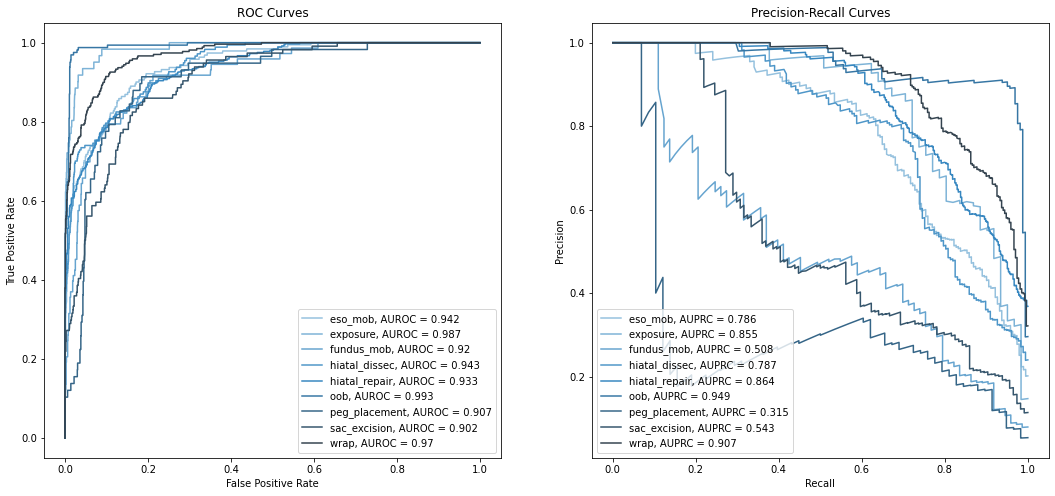

In [19]:
from sklearn.metrics import roc_curve, precision_recall_curve
from matplotlib import pyplot as plt
import seaborn as sns
#get the Blues_d colormap from seaborn
cmap = sns.color_palette("Blues_d", len(cols))

#make a dictionary for tprs, fprs, precision, and recall
tprs = {}
fprs = {}
precision = {}
recall = {}
for phase in cols:
    fprs[phase], tprs[phase], _ = roc_curve(trues_df[phase + '_true'], preds_df[phase + '_pred'])
    precision[phase], recall[phase], _ = precision_recall_curve(trues_df[phase + '_true'], preds_df[phase + '_pred'])

#plot the roc and pr curves on two adjacent subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
for phase in cols:
    ax1.plot(fprs[phase], tprs[phase], label=phase + ', AUROC = ' + str(round(scores_df.loc[phase]['AUROC'], 3)), color=cmap[cols.index(phase)])
    ax2.plot(recall[phase], precision[phase], label=phase + ', AUPRC = ' + str(round(scores_df.loc[phase]['AUPRC'], 3)), color=cmap[cols.index(phase)])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curves')
ax1.legend()
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curves')
ax2.legend()
#make the font bigger
plt.rcParams.update({'font.size': 16})
plt.savefig('../results/figures/roc_pr_curves_ResNet50_imagenet_050923.png', dpi=300, bbox_inches='tight')

In [21]:
preds_df_2 = preds_df.copy()
#drop the path column
preds_df_2.drop('path_pred', axis=1, inplace=True)
preds_df_2.idxmax(axis=1).value_counts()

hiatal_repair_pred    321
hiatal_dissec_pred    294
wrap_pred             235
eso_mob_pred          225
fundus_mob_pred       104
exposure_pred          90
oob_pred               86
peg_placement_pred     58
sac_excision_pred      56
dtype: int64

In [22]:
trues_df_2 = trues_df.copy()
#drop the path column
trues_df_2.drop('path_true', axis=1, inplace=True)

In [23]:
#make a confusion matrix of all the phases
pred_true_df = pd.DataFrame(columns=['pred', 'true'])
#for each row in preds_df and trues_df, the pred and true values are the column name of the max value
for index, row in preds_df_2.iterrows():
    #first, get the column name of the max value in the row, remove the _pred from the column name
    pred = str(row.idxmax())[:-5]
    #then, get the true value from the trues_df, remove the _true from the column name
    true = str(trues_df_2.loc[index].idxmax())[:-5]
    #add the pred and true values to the pred_true_df
    pred_true_df.loc[index] = [pred, true]
pred_true_df.head()
    

    

pred           true
0  hiatal_dissec  hiatal_dissec
1  hiatal_dissec  hiatal_dissec
2  hiatal_dissec  peg_placement
3     fundus_mob     fundus_mob
4  hiatal_dissec   sac_excision

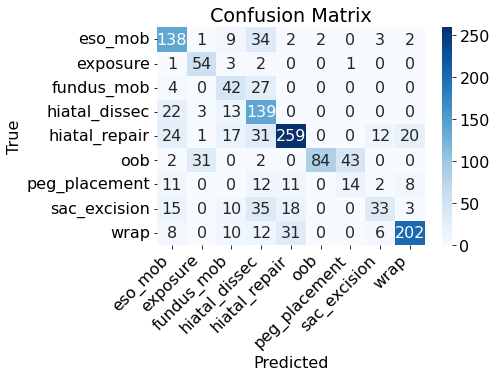

In [24]:
#create a confusion matrix
cm = confusion_matrix(pred_true_df['true'], pred_true_df['pred'], labels=cols)
cm_df = pd.DataFrame(cm, index=cols, columns=cols)
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
#rotate the xticks
plt.xticks(rotation=45, ha='right')
plt.savefig('../results/figures/confusion_matrix_ResNet50_imagenet_050923.png', dpi=300, bbox_inches='tight')

In [25]:
#find top losses for each phase, show the image, the predicted label, and the true label
losses_df = pd.DataFrame(columns=cols)
for phase in cols:
    #get the predicted probability of each class and the true class for the current phase
    preds = preds_df[phase + '_pred']
    trues = trues_df[phase + '_true']
    #calculate the loss for each image
    losses = np.abs(preds - trues)
    #add the losses to the losses_df
    losses_df[phase] = losses
losses_df['path'] = preds_df['path_pred']
losses_df.head()

eso_mob      exposure    fundus_mob  hiatal_dissec  hiatal_repair  \
0  2.646268e-02  4.715062e-03  2.149370e-01   2.475944e-01   1.579521e-05   
1  2.803916e-10  1.130062e-09  9.138002e-07   9.536743e-07   1.158467e-15   
2  6.887877e-02  7.774602e-02  1.733553e-01   6.121503e-01   1.567264e-02   
3  2.727541e-02  1.370058e-02  1.468924e-01   1.050024e-01   2.111914e-04   
4  3.599246e-02  1.153013e-02  9.737442e-02   7.980454e-01   3.646923e-03   

            oob  peg_placement  sac_excision          wrap  \
0  1.292812e-08   5.426663e-06  1.454340e-03  4.142396e-06   
1  1.814680e-20   1.629043e-14  2.073959e-10  2.949471e-15   
2  4.859254e-04   9.687835e-01  1.872880e-02  1.765771e-03   
3  6.919301e-06   1.649769e-04  3.873928e-04  1.434898e-04   
4  2.245540e-05   3.633340e-04  9.472098e-01  2.345825e-04   

                                               path  
0   ../data/frames/test/hiatal_dissec/vid_0_610.jpg  
1  ../data/frames/test/peg_placement/vid_0_3840.jpg  
2               ../data/frames/test/oob/vid_1_0.jpg  
3  ../data/frames/test/hiatal_dissec/vid_1_1070.jpg  
4          ../data/frames/test/wrap/vid_11_4900.jpg

In [26]:
losses = losses_df.sort_values(by='hiatal_dissec', ascending=False)
losses.head()

eso_mob  exposure  fundus_mob  hiatal_dissec  hiatal_repair  \
798   0.999168  0.000002    0.000420       0.998683   3.572816e-06   
171   0.000078  0.000008    0.998068       0.997747   5.062406e-06   
1318  0.005268  0.000011    0.997506       0.990027   1.521605e-04   
76    0.000023  0.000120    0.010913       0.988106   5.905003e-07   
745   0.000040  0.000426    0.014135       0.983359   1.188578e-06   

               oob  peg_placement  sac_excision          wrap  \
798   5.588394e-10   5.665407e-07      0.000060  9.764494e-08   
171   2.643621e-11   2.960378e-06      0.000226  5.674898e-07   
1318  1.551816e-08   5.081805e-05      0.001990  7.851537e-06   
76    2.088534e-08   2.025616e-05      0.999196  1.368216e-05   
745   6.242037e-08   2.735784e-05      0.998003  1.297300e-05   

                                                  path  
798   ../data/frames/test/hiatal_dissec/vid_1_1370.jpg  
171           ../data/frames/test/wrap/vid_11_4580.jpg  
1318  ../data/frames/test/peg_placement/vid_1_3520.jpg  
76             ../data/frames/test/wrap/vid_1_4980.jpg  
745            ../data/frames/test/wrap/vid_0_5870.jpg

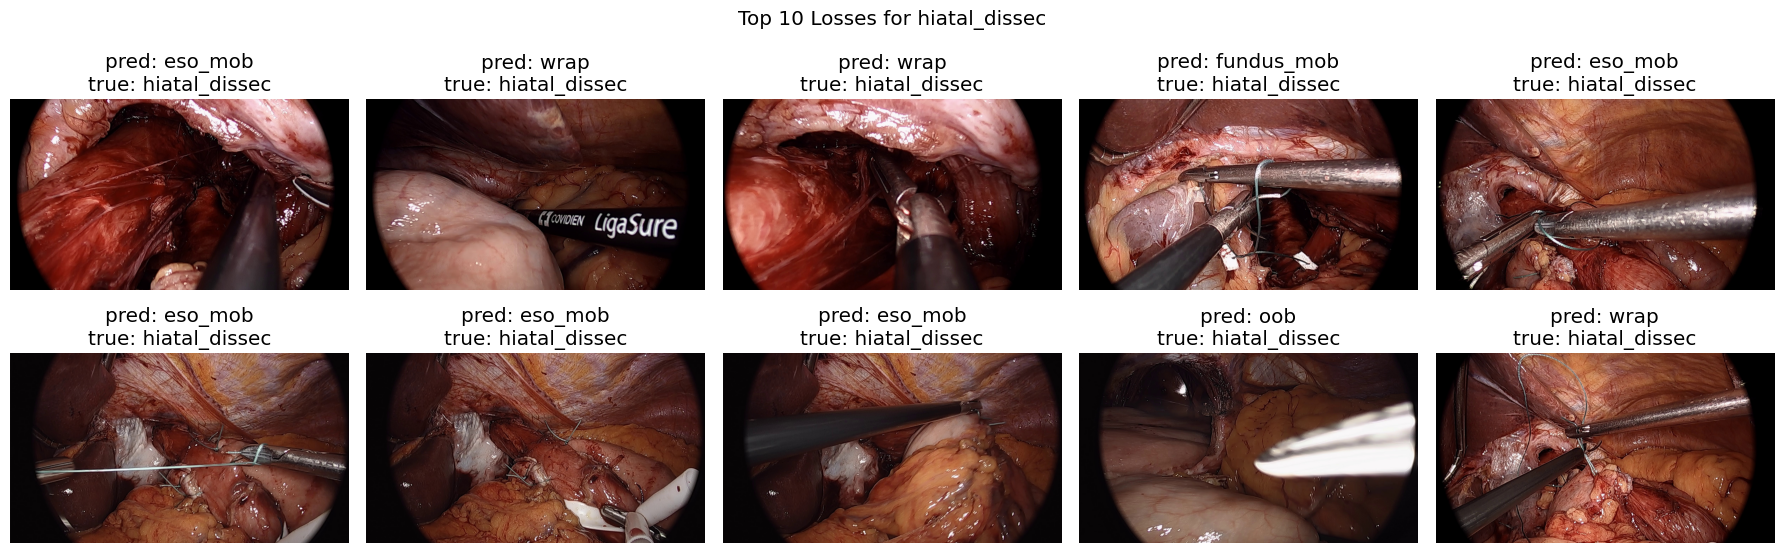

In [98]:
#for the hiatal_dissec phase, show the top 5 losses with the predicted label and the true label
for i in range(10):
    #get the index of the first row
    index = losses.index[i]
    #get the path of the image
    path = losses.loc[index]['path']
    #get the predicted label
    pred = pred_true_df.loc[index]['pred']
    #get the true label
    true = pred_true_df.loc[index]['true']
    #show the images on a 2x5 grid, with the phase name as the title
    plt.subplot(2, 5, i+1)
    plt.imshow(plt.imread(path))
    plt.title('pred: ' + pred + '\ntrue: ' + true)
    plt.axis('off')
#make the images bigger and more spaced out
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [18, 10]
plt.suptitle('Top 10 Losses for hiatal_dissec')
plt.tight_layout()
plt.savefig('../results/figures/top_losses/hiatal_dissec_ResNet50_imagenet_050923.png', dpi=300, bbox_inches='tight')

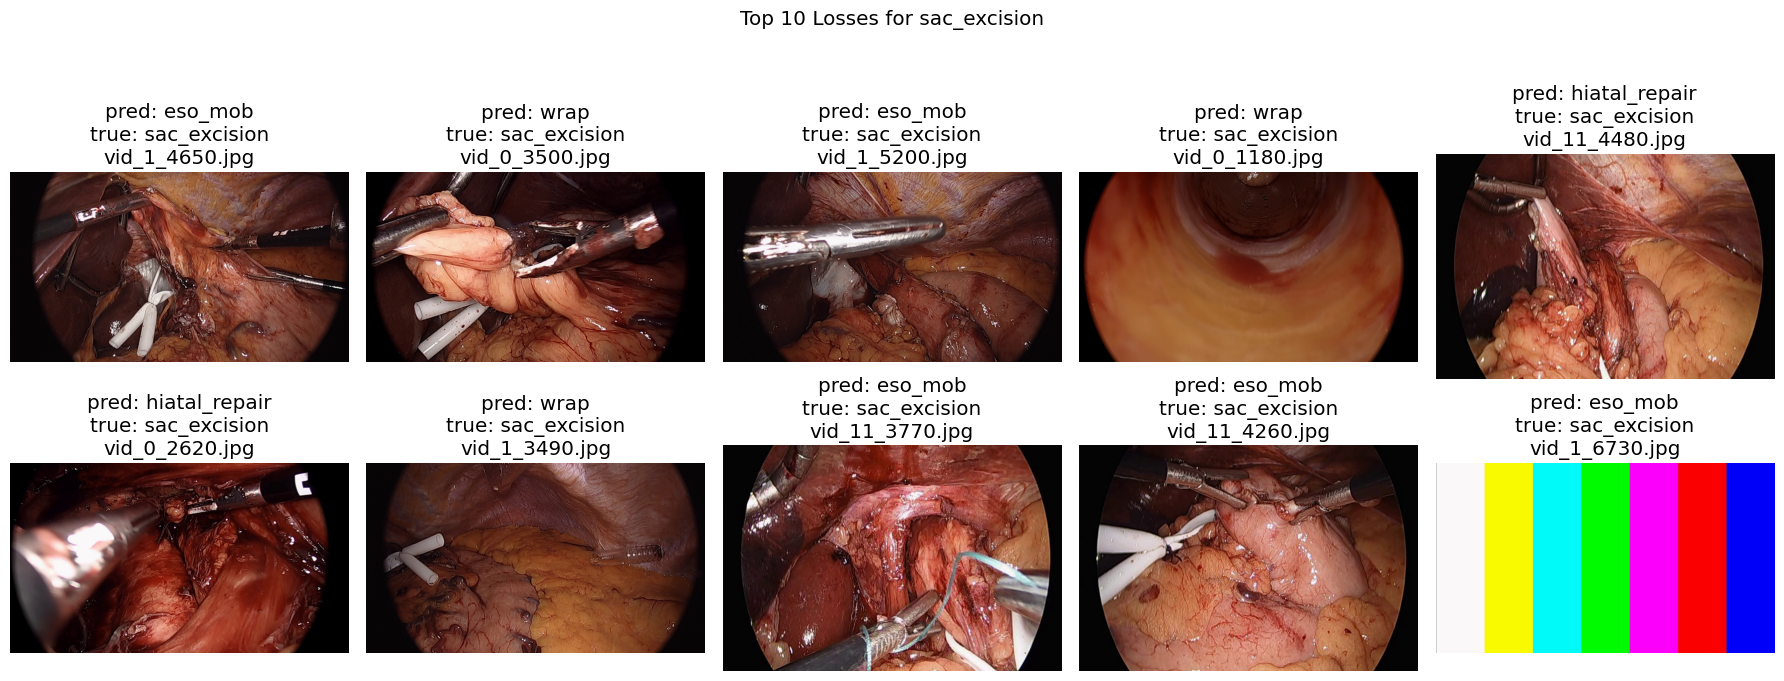

In [102]:
#repeat for the other phases
for phase in cols:
    losses = losses_df.sort_values(by=phase, ascending=False)
    for i in range(10):
        index = losses.index[i]
        path = losses.loc[index]['path']
        pred = pred_true_df.loc[index]['pred']
        true = pred_true_df.loc[index]['true']
        plt.subplot(2, 5, i+1)
        plt.imshow(plt.imread(path))
        img_name = path.split('/')[-1]
        plt.title('pred: ' + pred + '\ntrue: ' + true + '\n' + img_name)
        plt.axis('off')
    plt.rcParams.update({'font.size': 12})
    plt.rcParams['figure.figsize'] = [18, 8]
    plt.suptitle('Top 10 Losses for ' + phase)
    plt.tight_layout()
    plt.savefig('../results/figures/top_losses/' + phase + '_ResNet50_imagenet_050923.png', dpi=300, bbox_inches='tight')


In [ ]:
#list of timestamps where losses are highest
top_loss_df = pd.DataFrame(columns=['video', 'timestamp', 'loss'])

In [47]:
#get summary stats for the losses
losses_df.describe()

hiatal_dissec           oob          wrap      eso_mob  hiatal_repair   
count   1.469000e+03  1.469000e+03  1.469000e+03  1469.000000   1.469000e+03  \
mean    1.058649e-01  3.575730e-02  7.809047e-02     0.143565   1.296922e-01   
std     2.128167e-01  1.302954e-01  1.803476e-01     0.225835   2.624565e-01   
min     1.503384e-15  1.775827e-14  8.597348e-24     0.000000   2.384791e-20   
25%     1.240227e-04  9.184471e-07  1.026372e-04     0.000686   2.119077e-04   
50%     6.757874e-03  1.120197e-04  3.846729e-03     0.032091   4.922953e-03   
75%     8.918854e-02  3.059083e-03  3.805322e-02     0.187997   9.016712e-02   
max     9.991682e-01  9.978073e-01  9.991559e-01     0.998682   9.990807e-01   

         fundus_mob      exposure  peg_placement  sac_excision  
count  1.469000e+03  1.469000e+03   1.469000e+03  1.469000e+03  
mean   5.655064e-02  5.572219e-02   8.052923e-02  8.721384e-02  
std    2.211664e-01  1.884190e-01   2.108510e-01  2.069865e-01  
min    1.721791e-23  1.438509e-18   3.790815e-14  2.068297e-17  
25%    8.772505e-09  3.083037e-06   6.887324e-05  6.762099e-05  
50%    8.837197e-07  1.234578e-04   1.633466e-03  2.558510e-03  
75%    6.924116e-05  2.927830e-03   3.342209e-02  3.283180e-02  
max    9.999916e-01  9.999962e-01   9.998163e-01  9.987121e-01

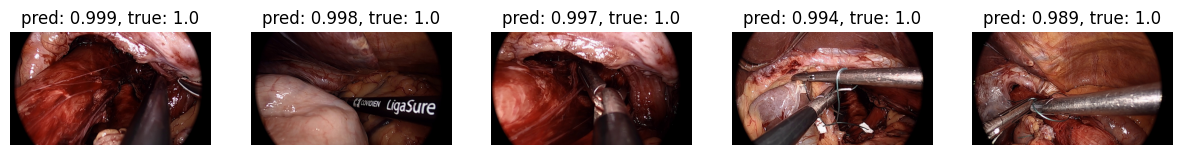

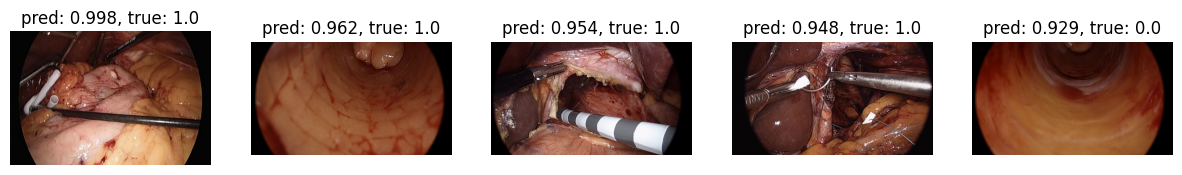

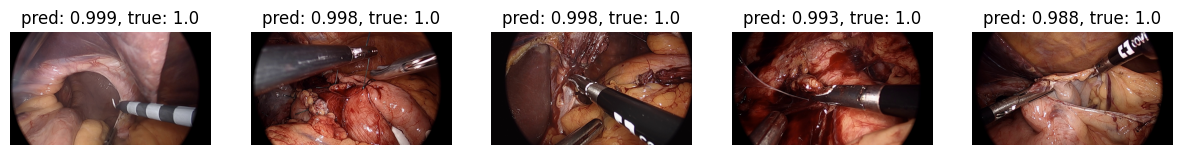

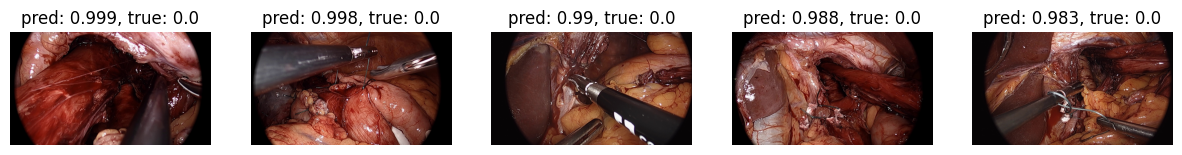

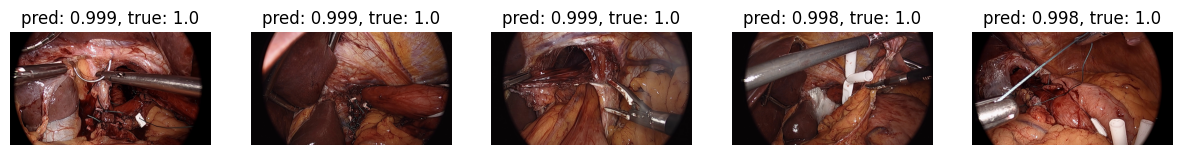

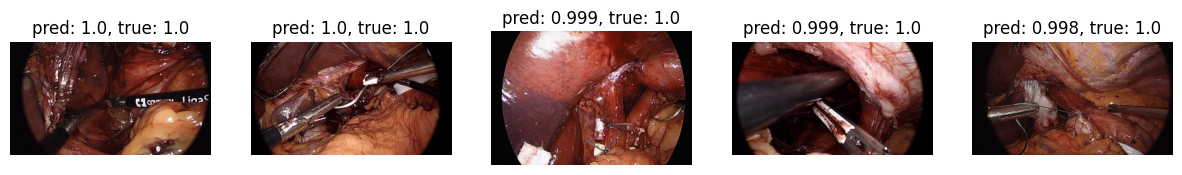

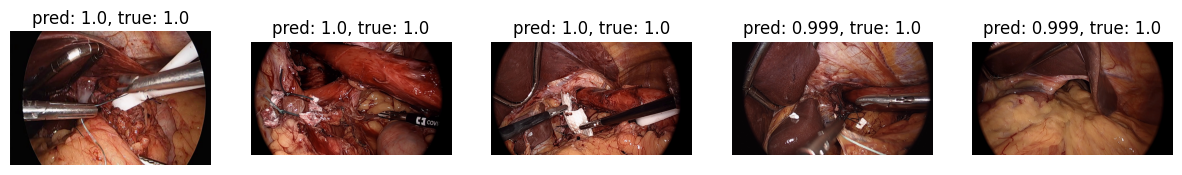

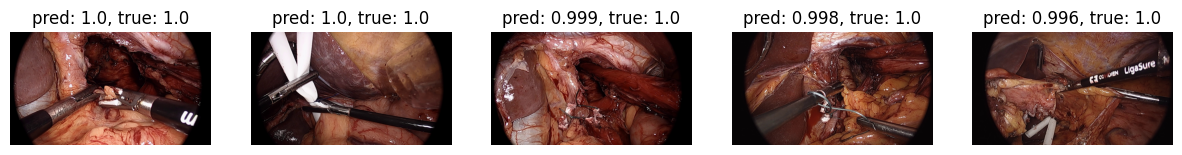

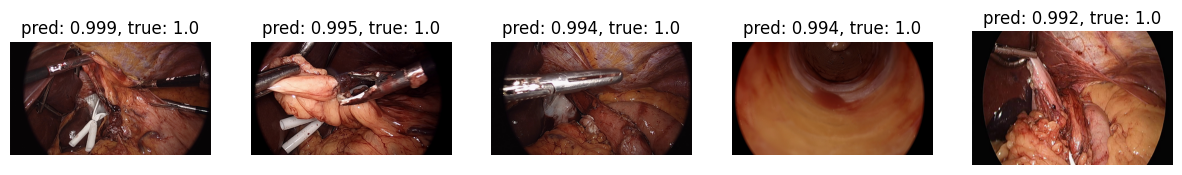

In [51]:
#for each phase, find the top 5 losses, show the image, the predicted label, and the true label (show them in a 9x5 grid)
for phase in cols:
    #sort the losses for the current phase
    losses = losses_df.sort_values(by=phase, ascending=False)
    #get the top 5 losses
    losses = losses.head(5)
    #get the image paths for the top 5 losses
    paths = losses['path']
    #get the predicted labels for the top 5 losses, which is the column with the maximum predicted probability from the preds_df
    pred = preds_df[preds_df['path_pred'].isin(paths)][phase + '_pred']
    
    #get the true labels for the top 5 losses
    trues = trues_df[trues_df['path_true'].isin(paths)][phase + '_true']
    #plot the images, the predicted labels, and the true labels
    plt.figure(figsize=(15, 15))
    for i in range(len(paths)):
        plt.subplot(5, 5, i + 1)
        plt.imshow(plt.imread(paths.iloc[i]))
        plt.title('pred: ' + str(round(preds.iloc[i], 3)) + ', true: ' + str(trues.iloc[i]))
        plt.axis('off')
    plt.show()